In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url="https://time.mk/?q=bitcoin&search=news&startdate=01.01.2023&enddate=21.11.2023&order=dec"
response = requests.get(url)
response.encoding = 'utf-8'
html_doc = response.text
soup = BeautifulSoup(html_doc, 'html.parser')

In [ ]:
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "https://www.w3.org/TR/html4/loose.dtd">
<html><head><base href="https://time.mk/"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="1850" http-equiv="refresh"/><meta content="Time.mk" http-equiv="Author"/><script type="text/javascript">  if (top.location != location) { top.location.href = document.location.href; } </script><link href="images/time.ico" rel="icon" type="image/x-icon"/><meta content="width=device-width" name="viewport"><title>Пребарување</title><link href="dizajn/css/stylesheet_simple.css?ver=44" rel="stylesheet" type="text/css"/><!--[if IE 7]><link rel="stylesheet" type="text/css" href="dizajn/css/stylesheet-ie7.min.css"><![endif]--><!--[if IE 8]><link rel="stylesheet" type="text/css" href="dizajn/css/stylesheet-ie8.min.css"><![endif]--><link attr="color_css"/><script type="text/javascript">
                 function save_color_scheme(shade){localStorage.setItem('color_schem

In [ ]:
titles=[]
for x in soup.findAll('div', class_='cluster'):
  titles.append(x.findChild().text)

In [ ]:
titles

['НАЈНОВИ ПОДАТОЦИ: Вредноста на биткоинот падна за еден процент',
 'НАЈНОВИ ПОДАТОЦИ: Вредноста на биткоинот падна за еден процент',
 'Американската Влада поседува пет милијарди долари во биткоин, ова се причините',
 'Голем пад на глобалната трговија со биткоин во април, инвеститорите чекаат',
 'Инвеститорите чекаат: Голем пад на трговијата со биткоини',
 'Голем пад на трговијата со биткоини, инвеститорите чекаат',
 'Bitcoin во јануари порасна за 40 отсто',
 'Како бугарската крипто кралица го измами цел свет?']

In [ ]:
sources_elem = soup.findAll('a', class_='source')
sources=[]
for source in sources_elem:
  sources.append(source.text)

In [ ]:
sources

['4NEWS', 'ТВ21', 'Пари', 'Порта', 'Вечер Прес', 'Точка', 'Порта', 'Centar']

In [ ]:
date_elem=soup.findAll('span', class_='when')
dates=[]
for date in date_elem:
  dates.append(date.text)

In [ ]:
dates

[' 16.11.2023',
 ' 16.11.2023',
 ' 18.10.2023',
 ' 04.05.2023',
 ' 04.05.2023',
 ' 03.05.2023',
 ' 31.01.2023',
 ' 25.01.2023']

With paging

In [ ]:
def data_scraping(page):
  url = "https://time.mk/?q=bitcoin&search=news&order=dec&startdate=01.10.2021&enddate=21.11.2023&page="+str(page)
  response = requests.get(url)
  response.encoding = 'utf-8'
  html_doc = response.text
  soup = BeautifulSoup(html_doc, 'html.parser')
  titles=[]
  for x in soup.findAll('div', class_='cluster'):
    titles.append(x.findChild().text)
  sources_elem = soup.findAll('a', class_='source')
  sources=[]
  for source in sources_elem:
    sources.append(source.text)
  date_elem=soup.findAll('span', class_='when')
  dates=[]
  for date in date_elem:
    dates.append(date.text)
  return titles,sources,dates

In [ ]:
titles=[]
sources = []
dates= []
for i in range(1,10):
  tmp_titles,tmp_sources,tmp_dates=data_scraping(i)
  titles.extend(tmp_titles)
  sources.extend(tmp_sources)
  dates.extend(tmp_dates)

In [ ]:
len(titles)==len(sources)==len(dates)

True

In [ ]:
import pandas as pd

In [ ]:
dict_={'Title':titles,'Source':sources,'Date':dates}
df=pd.DataFrame(dict_)

In [ ]:
df

,Title,Source,Date
0,НАЈНОВИ ПОДАТОЦИ: Вредноста на биткоинот падна...,4NEWS,16.11.2023
1,НАЈНОВИ ПОДАТОЦИ: Вредноста на биткоинот падна...,ТВ21,16.11.2023
2,Американската Влада поседува пет милијарди дол...,Пари,18.10.2023
3,Голем пад на глобалната трговија со биткоин во...,Порта,04.05.2023
4,Инвеститорите чекаат: Голем пад на трговијата ...,Вечер Прес,04.05.2023
...,...,...,...
76,Зошто 14-ти ноември е толку важен датум за Bit...,Локално,12.11.2021
77,Bitcoin достигна нов историски максимум – Bitc...,Порта,05.11.2021
78,Биткоин неприкосновен победник со добивка од 4...,Пари,04.11.2021
79,Објавено е првото тргување со биткоин фјучерси,Локално,20.10.2021


In [ ]:
url2="https://www.investing.com/crypto/bitcoin/historical-data"
response2 = requests.get(url2)
html_doc2 = response2.text
soup2 = BeautifulSoup(html_doc2, 'html.parser')

In [ ]:
table =soup2.find('table', class_='w-full text-xs leading-4 overflow-x-auto freeze-column-w-1')
tableHead=table.select('thead')[0]
tableHead


<thead class="relative after:absolute after:bottom-0 after:bg-[#ECEDEF] after:h-px after:left-0 after:right-0"><tr class="h-[41px]"><th class="text-v2-black font-semibold text-left min-w-[106px] left-0 sticky bg-white">Date</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]">Price</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]"> <!-- -->Open</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]">High</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]"> <!-- -->Low</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[87px]"> <!-- -->Vol.</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:t

In [ ]:
tableHead

<thead class="relative after:absolute after:bottom-0 after:bg-[#ECEDEF] after:h-px after:left-0 after:right-0"><tr class="h-[41px]"><th class="text-v2-black font-semibold text-left min-w-[106px] left-0 sticky bg-white">Date</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]">Price</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]"> <!-- -->Open</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]">High</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[77px]"> <!-- -->Low</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:text-right w-[10%] min-w-[87px]"> <!-- -->Vol.</th><th class="text-v2-black font-semibold text-xs leading-4 tracking-[0.2px] text-right rtl:t

In [ ]:
headers=[]
for x in tableHead.findAll('tr'):
  for y in x.findAll('th'):
    headers.append(y.text)

In [ ]:
headers

['Date', 'Price', ' Open', 'High', ' Low', ' Vol.', ' Change %']

In [ ]:
table =soup2.find('table', class_='w-full text-xs leading-4 overflow-x-auto freeze-column-w-1')
tableBody=table.select('tbody')[0]
tableBody

<tbody><tr class="h-[41px] hover:bg-[#F5F5F5] relative after:absolute after:bottom-0 after:bg-[#ECEDEF] after:h-px after:left-0 after:right-0 historical-data-v2_price__atUfP"><td class="datatable_cell__LJp3C text-left align-middle overflow-hidden text-v2-black text-ellipsis whitespace-nowrap text-sm font-semibold leading-4 min-w-[106px] left-0 sticky bg-white sm:bg-inherit"><time datetime="11/21/2023">11/21/2023</time></td><td class="datatable_cell__LJp3C datatable_cell--align-end__qgxDQ datatable_cell--down___c4Fq text-right text-sm font-normal leading-5 align-middle min-w-[77px] rtl:text-right text-[#D91400]" dir="ltr">36,881.9</td><td class="text-v2-black text-right text-sm font-normal leading-5 align-middle min-w-[77px] rtl:text-right" data-test="relative-most-active-last">37,452.7</td><td class="text-v2-black text-right text-sm font-normal leading-5 align-middle min-w-[77px] rtl:text-right" data-test="relative-most-active-last">37,631.2</td><td class="text-v2-black text-right text

In [ ]:
tableValues= []
for x in tableBody.findAll('tr')[1:]:
  td_tags = x.findAll('td')
  td_val = [y.text.replace("$", "").replace(",", "") for y in td_tags]
  tableValues.append(td_val)


In [ ]:
tableValues

[['11/20/2023',
  '37454.1',
  '37356.6',
  '37735.6',
  '36857.6',
  '51.80K',
  '+0.27%'],
 ['11/19/2023',
  '37354.2',
  '36568.6',
  '37504.6',
  '36393.3',
  '26.14K',
  '+2.15%'],
 ['11/18/2023',
  '36568.6',
  '36617.5',
  '36845.2',
  '36220.6',
  '20.88K',
  '-0.07%'],
 ['11/17/2023',
  '36595.4',
  '36161.8',
  '36690.6',
  '35875.2',
  '51.37K',
  '+1.20%'],
 ['11/16/2023',
  '36161.2',
  '37873.9',
  '37907.6',
  '35561.6',
  '66.92K',
  '-4.52%'],
 ['11/15/2023',
  '37874.9',
  '35549.3',
  '37954.1',
  '35379.6',
  '75.51K',
  '+6.54%'],
 ['11/14/2023',
  '35549.3',
  '36478.3',
  '36744.5',
  '34984.3',
  '63.56K',
  '-2.55%'],
 ['11/13/2023',
  '36478.3',
  '37067.8',
  '37404.6',
  '36358.4',
  '44.55K',
  '-1.58%'],
 ['11/12/2023',
  '37064.4',
  '37149.0',
  '37215.3',
  '36761.9',
  '21.45K',
  '-0.23%'],
 ['11/11/2023',
  '37150.5',
  '37306.3',
  '37401.3',
  '36767.6',
  '29.53K',
  '-0.41%'],
 ['11/10/2023',
  '37303.0',
  '36700.5',
  '37496.1',
  '36347.2',
  

In [ ]:
df2= pd.DataFrame(tableValues, columns=headers)

In [ ]:
df2

,Date,Price,Open,High,Low,Vol.,Change %
0,11/20/2023,37454.1,37356.6,37735.6,36857.6,51.80K,+0.27%
1,11/19/2023,37354.2,36568.6,37504.6,36393.3,26.14K,+2.15%
2,11/18/2023,36568.6,36617.5,36845.2,36220.6,20.88K,-0.07%
3,11/17/2023,36595.4,36161.8,36690.6,35875.2,51.37K,+1.20%
4,11/16/2023,36161.2,37873.9,37907.6,35561.6,66.92K,-4.52%
5,11/15/2023,37874.9,35549.3,37954.1,35379.6,75.51K,+6.54%
6,11/14/2023,35549.3,36478.3,36744.5,34984.3,63.56K,-2.55%
7,11/13/2023,36478.3,37067.8,37404.6,36358.4,44.55K,-1.58%
8,11/12/2023,37064.4,37149.0,37215.3,36761.9,21.45K,-0.23%
9,11/11/2023,37150.5,37306.3,37401.3,36767.6,29.53K,-0.41%


In [ ]:
#df2['High'] = df2['High'].replace(regex={',': ''})

In [ ]:
df2['High']=pd.to_numeric(df2['High'], downcast='float', errors='raise')

In [ ]:
df2[' Open']=pd.to_numeric(df2[' Open'], downcast='float', errors='raise')

<Axes: >

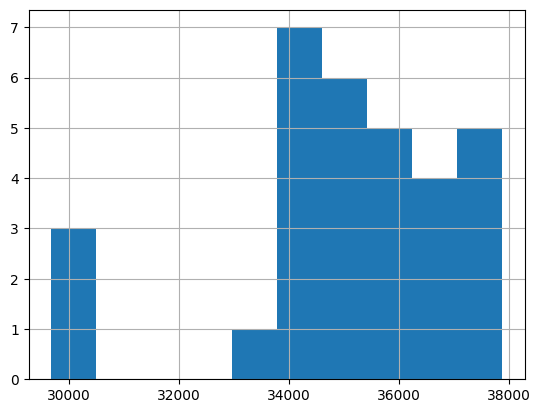

In [ ]:
df2[' Open'].hist()